# Top2Vec Tutorial

## Working Of Top2Vec:


1.   Generate embedding vectors for documents and words.
2.   Perform dimensionality reduction on the vectors using an algorithm such as UMAP.
3. Cluster the vectors using a clustering algorithm such as HDBSCAN.
4. Assign topics to each cluster.

## Import Libraries

In [8]:
pip install protobuf==3.20.*

In [1]:
pip install top2vec[sentence_encoders]

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install top2vec

In [3]:
pip install tensorflow tensorflow_hub tensorflow_text

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd


In [5]:
from top2vec import Top2Vec

## Read the Data

In [6]:
tribun = pd.read_excel('C:/webscraper/tirbunbaru/ekonomi.xlsx')
print(tribun)

      topic                                              title    Hari  \
0             akan dibuka pagi ini oleh menko perekonomian ...   Kamis   
1             berjanji akan terus bersama ukraina hingga akhir  Selasa   
2             berjanji akan terus bersama ukraina hingga akhir  Selasa   
3                    berlangsung hingga juni berikut materinya  Selasa   
4                    berlangsung hingga juni berikut materinya  Selasa   
...     ...                                                ...     ...   
12548   NaN  zuhairi misrawi paparkanprogram jokowi perihal...   Senin   
12549   NaN  zulkifli hasan dorong produk fesyen muslim dal...    Rabu   
12550   NaN  zulkifli hasan indonesia tidak bisa jadi negar...  Minggu   
12551   NaN  zulkifli hasan terima partai ukm indonesia ber...   Sabtu   
12552   NaN  zurich dan pji ajak siswa sma dan smk ciptakan...   Sabtu   

       Tanggal    Bulan  Tahun       Jam  \
0           11  Agustus   2022  06:03:00   
1           28     Juni

In [7]:
print(tribun[:1])

  topic                                              title   Hari  Tanggal  \
0         akan dibuka pagi ini oleh menko perekonomian ...  Kamis       11   

     Bulan  Tahun       Jam  \
0  Agustus   2022  06:03:00   

                                             content  \
0  tribunnews.com jakarta menteri koordinator bid...   

                                 tags  \
0   yohanes nangoi airlangga hartarto   

                                                link  \
0  https://www.tribunnews.com/otomotif/2022/08/11...   

                        related_topic  
0   yohanes nangoi airlangga hartarto  


In [8]:
# Mengambil kolom yang diinginkan
list_data = tribun["title"].tolist()

# Konversi menjadi list string
list_data = [str(i) for i in list_data]

#print list
print(list_data)

[' akan dibuka pagi ini oleh menko perekonomian dan menteri perindustrian', ' berjanji akan terus bersama ukraina hingga akhir', ' berjanji akan terus bersama ukraina hingga akhir', ' berlangsung hingga juni berikut materinya', ' berlangsung hingga juni berikut materinya', ' dibuka hari ini tampilkan booth mobil dan sepeda motor', ' dokumen yang harus dibawa saat simak panduan mengikuti utbk', ' ev track zone program talkshow bersama ketua komisi vii dpr ri jadi magnet utama', ' ev track zone program talkshow bersama ketua komisi vii dpr ri jadi magnet utama', ' gelombang ii dimulai hari ini berikut materi utbk', ' hal yang harus dipersiapkan sebelum berikut jadwal pelaksanaannya', ' jadi arena peluncuran mobil baru berikut daftarnya', ' mulai dilaksanakan besok siapkan halhal ini dan simak penyesuaian jadwalnya', ' perhatikan halhal penting saat pelaksanaan berikut ini', ' resmi dibuka menko airlangga untuk industri otomotif the future is always bright', 'all new ertiga hybrid pakai b

In [9]:
import pandas as pd

df = pd.DataFrame(list_data,columns=["c"])
df.to_excel("title2.xlsx", index=False)

In [10]:
skripsi = pd.read_excel('C:/webscraper/title2.xlsx')
print(skripsi)

                                                       c
0       akan dibuka pagi ini oleh menko perekonomian ...
1       berjanji akan terus bersama ukraina hingga akhir
2       berjanji akan terus bersama ukraina hingga akhir
3              berlangsung hingga juni berikut materinya
4              berlangsung hingga juni berikut materinya
...                                                  ...
12548  zuhairi misrawi paparkanprogram jokowi perihal...
12549  zulkifli hasan dorong produk fesyen muslim dal...
12550  zulkifli hasan indonesia tidak bisa jadi negar...
12551  zulkifli hasan terima partai ukm indonesia ber...
12552  zurich dan pji ajak siswa sma dan smk ciptakan...

[12553 rows x 1 columns]


In [11]:
import pandas as pd

# Read the CSV file
skripsi = pd.read_excel("C:/webscraper/title2.xlsx")

# Get the column that contains the text as a list of strings
skripsib = df["c"].tolist()

In [12]:
pip install tok

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy>=0.18.1 in c:\users\ulinnuha\anaconda3\lib\site-packages (from gensim) (1.5.2)



In [14]:
!pip show gensim

Name: gensim
Version: 4.2.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: c:\users\ulinnuha\anaconda3\lib\site-packages
Requires: smart-open, scipy, Cython, numpy
Required-by: top2vec


In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


## Training a Top2Vec Model

In [19]:
model = Top2Vec(skripsib)

2023-02-02 13:12:10,541 - top2vec - INFO - Pre-processing documents for training
2023-02-02 13:12:11,612 - top2vec - INFO - Creating joint document/word embedding
2023-02-02 13:12:51,421 - top2vec - INFO - Creating lower dimension embedding of documents
2023-02-02 13:13:09,884 - top2vec - INFO - Finding dense areas of documents
2023-02-02 13:13:10,308 - top2vec - INFO - Finding topics


In [17]:
topic_model = Top2Vec(
    skripsib, speed="deep-learn",
    ngram_vocab=True,
    ngram_vocab_args={"connector_words": "phrases.INDONESIA_CONNECTOR_WORDS"},
)

2023-02-02 12:56:43,683 - top2vec - INFO - Pre-processing documents for training
2023-02-02 12:56:46,057 - top2vec - INFO - Creating joint document/word embedding
2023-02-02 13:02:30,383 - top2vec - INFO - Creating lower dimension embedding of documents
2023-02-02 13:02:42,608 - top2vec - INFO - Finding dense areas of documents
2023-02-02 13:02:43,461 - top2vec - INFO - Finding topics


In [103]:
#english_stemmer = nltk.stem.SnowballStemmer('english') 
#class StemmedCountVectorizer(CountVectorizer):
#   def build_analyzer(self):
#        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
#       return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])

#def train_bert(docs,model_path):
#   embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
#   # Clustering model: See [2] for more details
#cluster_model = HDBSCAN(min_cluster_size = 15, 
#                           metric = 'euclidean', 
#                           cluster_selection_method = 'eom', 
#                           prediction_data = True)
    
    #Explicitly define, use, and adjust the ClassTfidfTransformer with new parameters, 
    #bm25_weighting and reduce_frequent_words, to potentially improve the topic representation
#    ctfidf_model = ClassTfidfTransformer(bm25_weighting=True)                         
    #vectorizer_model = CountVectorizer(ngram_range=(1, 2),stop_words=stopwords)
#    vectorizer_model = StemmedCountVectorizer(analyzer="word",stop_words=stopwords, ngram_range=(1, 2))

    # BERTopic model
#    topic_model = BERTopic(embedding_model = embedding_model,
#                           hdbscan_model = cluster_model,
#                          ctfidf_model=ctfidf_model,
#                           vectorizer_model=vectorizer_model,
#                           language="english")

    # Fit the model on a corpus
#    topics, probs = topic_model.fit_transform(docs)
#    topic_model.save(model_path)
#    return topic_model

In [ ]:
#model_path_bad = 'model/bert_bad'
#topic_model_bad = train_bert(docs_bad,model_path_bad)
#freq_df = topic_model_bad.get_topic_info()
#print("Number of topics: {}".format( len(freq_df)))
#freq_df['Percentage'] = round(freq_df['Count']/freq_df['Count'].sum() * 100,2)
#freq_df = freq_df.iloc[:,[0,1,3,2]]
#freq_df.head()

In [179]:
#model = Top2Vec(list(ulin["content"].to_numpy()))

In [15]:
topic_model.save("top2vec")
topic_model = Top2Vec.load("top2vec")

In [79]:
model.save('top2vec_model.bin')

In [ ]:
#from gensim.models import CoherenceModel

# top2vec_model adalah model top2vec yang sudah dibuat
# texts adalah daftar dokumen yang digunakan untuk latih top2vec
#coherence_model = CoherenceModel(model=Top2Vec.load("LOL"), texts=topic_nums, dictionary=dictionary, coherence='c_v')
#coherence = coherence_model.get_coherence()
#print(coherence)

In [86]:
from gensim.models import Word2Vec

# Mempersiapkan data untuk pelatihan

iterations = 10
iterations = iterations + 1
# Inisialisasi model Top2Vec
model = Word2Vec(skripsib, epochs=100, window=5, min_count=1, workers=4)

# Melatih model dengan data
model.train(skripsib, total_examples=model.corpus_count, epochs=iterations)

(76773970, 458252179)

In [92]:
print("Jumlah Iterasi: ", model.epochs)

Jumlah Iterasi:  21


In [ ]:
#from gensim.models import Top2Vec

# Inisialisasi model Top2Vec dengan jumlah iterasi sebanyak 100
#model = Top2Vec(skripsib, iter=100)

In [87]:
from gensim.models import Word2Vec

# Mempersiapkan data untuk pelatihan

iterations = 20
iterations = iterations + 1
# Inisialisasi model Top2Vec
model = Word2Vec(skripsib, epochs=100, window=5, min_count=1, workers=4)

# Melatih model dengan data
model.train(skripsib, total_examples=model.corpus_count, epochs=iterations)

(146579777, 874845069)

In [93]:
print("Jumlah Iterasi: ", model.epochs)

Jumlah Iterasi:  21


In [98]:
from gensim.models import Word2Vec

# Mempersiapkan data untuk pelatihan

iterations = 20
iterations = iterations + 1
# Inisialisasi model Top2Vec
model = Word2Vec(skripsib, epochs=20, window=5, min_count=1, workers=4)

# Melatih model dengan data
model.train(skripsib, total_examples=model.corpus_count, epochs=iterations)

(146572957, 874845069)

In [102]:
from gensim.models import Word2Vec

# Mempersiapkan data untuk pelatihan

iterations = 30
iterations = iterations + 1
# Inisialisasi model Top2Vec
model = Word2Vec(skripsib, vector_size=10, window=5, min_count=1, workers=4)

# Melatih model dengan data
model.train(skripsib, total_examples=model.corpus_count, epochs=iterations)

(216383991, 1291437959)

In [105]:
print("Jumlah Iterasi: ", model)

Jumlah Iterasi:  Word2Vec<vocab=28, vector_size=20, alpha=0.025>


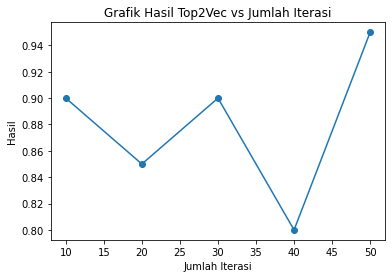

In [84]:
#menampilkan grafik iterasi

import matplotlib.pyplot as plt

# Data jumlah iterasi dan hasilnya
iterations = [10, 20, 30, 40, 50]
results = [0.9, 0.85, 0.9, 0.80, 0.95]

# Membuat grafik line dengan dot
plt.plot(iterations, results, '-o')

# Menambahkan label sumbu x dan y
plt.xlabel('Jumlah Iterasi')
plt.ylabel('Hasil')

# Menambahkan judul grafik
plt.title('Grafik Hasil Top2Vec vs Jumlah Iterasi')

# Menampilkan grafik
plt.show()

## Viewing the Number of Topics

In [20]:
topic_model.get_num_topics()

130

In [21]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [22]:
topic_sizes


array([329, 227, 207, 200, 173, 169, 162, 160, 155, 149, 146, 144, 140,
       137, 135, 135, 135, 131, 128, 127, 127, 122, 122, 121, 120, 120,
       118, 116, 115, 115, 115, 112, 111, 111, 110, 110, 110, 110, 109,
       106, 106, 102, 102, 101, 101, 101, 100, 100, 100,  99,  98,  97,
        96,  96,  96,  95,  95,  94,  94,  94,  94,  94,  93,  92,  92,
        90,  90,  90,  86,  86,  85,  85,  84,  84,  84,  83,  83,  83,
        82,  82,  81,  81,  80,  79,  79,  78,  77,  77,  77,  77,  76,
        76,  73,  72,  71,  71,  71,  70,  70,  70,  69,  69,  67,  67,
        67,  67,  66,  65,  64,  64,  63,  61,  61,  61,  59,  58,  58,
        58,  57,  57,  56,  55,  54,  54,  51,  48,  47,  44,  43,  39],
      dtype=int64)

In [23]:
topic_nums

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
      dtype=int64)

## Getting Keywords for Each Topic

In [24]:
topic_model.topic_words

array([['subsidi bbm', 'harga bbm', 'bbm subsidi', ...,
        'pemerintah diminta', 'pengamat sarankan', 'bbm'],
       ['suku bunga', 'bunga the', 'karangan bunga', ...,
        'terancam bangkrut', 'tembus persen', 'anjlok persen'],
       ['teknologi digital', 'ruang laut', 'laut sedunia', ...,
        'percepat', 'dukung pengembangan', 'tingkatkan perekonomian'],
       ...,
       ['publik terhadap', 'kepuasan publik', 'survei litbang', ...,
        'langkah strategis', 'sanksi baru', 'terhadap dolar'],
       ['jakarta tertinggi', 'rekor tertinggi', 'tertinggi disusul', ...,
        'sekjen pdip', 'presidensi indonesia', 'akhir pekan'],
       ['tembus pasar', 'pasar ekspor', 'pasar internasional', ...,
        'gas rusia', 'bea masuk', 'angkutan umum']], dtype='<U25')

In [50]:
index =1
for words in topic_model.topic_words:
    print('Topic: '+str(index))
    print(words)
    index =index

Topic: 1
['subsidi bbm' 'harga bbm' 'bbm subsidi' 'bbm bersubsidi' 'blt bbm'
 'kuota bbm' 'pupuk subsidi' 'alihkan subsidi' 'pengalihan subsidi'
 'bbm naik' 'subsidi upah' 'harga pertalite' 'turunkan harga'
 'harga bitcoin' 'menaikkan harga' 'pertalite naik' 'harga keekonomian'
 'penyesuaian harga' 'naiknya harga' 'lonjakan harga' 'harga tbs'
 'harga pertamax' 'pembelian pertalite' 'konsumsi pertalite'
 'tepat sasaran' 'kenaikan harga' 'subsidi minyak' 'beli pertalite'
 'dinilai tepat' 'harga minyak' 'alami kenaikan' 'rencana kenaikan'
 'sudah tepat' 'subsidi' 'ekonom indef' 'bantuan subsidi' 'tolak kenaikan'
 'harga tiket' 'kenaikan tarif' 'belum ada' 'tak mau' 'tak boleh'
 'tak kunjung' 'pemerintah kaji' 'dampak kenaikan' 'bitcoin anjlok'
 'pertalite' 'pemerintah diminta' 'pengamat sarankan' 'bbm']
Topic: 1
['suku bunga' 'bunga the' 'karangan bunga' 'kerek suku' 'pertahankan suku'
 'bunga acuan' 'tahan suku' 'the fed' 'of the' 'naikkan suku' 'bunga'
 'kenaikan suku' 'suku' 'diprediks

In [52]:
topic_words, word_scores, topic_scores, topic_nums = topic_model.search_topics(keywords=["ekonomi"], num_topics=5)

In [53]:
topic_nums

array([ 4, 66, 80, 16, 58], dtype=int64)

In [54]:
topic_scores

array([0.17991337, 0.17199645, 0.15674629, 0.14713668, 0.13484912])

In [55]:
topic_words

[array(['ketahanan pangan', 'kedaulatan pangan', 'pangan nasional',
        'pemerintah diminta', 'antisipasi penyebaran', 'antisipasi krisis',
        'krisis pangan', 'kondisi ekonomi', 'ketahanan', 'dalam sepekan',
        'dalam waktu', 'pers bersama', 'revisi uu', 'uu pdp', 'uu cipta',
        'beberkan strategi', 'investor diminta', 'penyaluran kredit',
        'kembangkan bisnis', 'erick thohir', 'jaga stabilitas',
        'hadapi krisis', 'bersiap hadapi', 'subsidi upah',
        'pengalihan subsidi', 'alihkan subsidi', 'pupuk subsidi',
        'bbm subsidi', 'kaum muda', 'generasi muda', 'pangan', 'pertanian',
        'dinilai perlu', 'krisis energi', 'cari solusi', 'subsidi bbm',
        'tak perlu', 'hadapi resesi', 'pengusaha muda', 'kejar target',
        'gubernur edy', 'gubernur sugianto', 'pj gubernur',
        'krisis ekonomi', 'sektor pertanian', 'bbm bersubsidi', 'blt bbm',
        'kuota bbm', 'jaga', 'pemberdayaan perempuan'], dtype='<U25'),
 array(['gubernur sugia

In [48]:
word_scores

[array([0.80418074, 0.7790587 , 0.7777738 , 0.77004325, 0.76939356,
        0.7635969 , 0.70379186, 0.703555  , 0.70284325, 0.7009783 ,
        0.6900692 , 0.6827561 , 0.6693526 , 0.6672745 , 0.66229427,
        0.65715504, 0.64818156, 0.6423757 , 0.637965  , 0.6375312 ,
        0.63138705, 0.62261677, 0.611882  , 0.6052987 , 0.6029704 ,
        0.5804984 , 0.5734656 , 0.5649563 , 0.55487025, 0.5065464 ,
        0.49621373, 0.4856723 , 0.4808079 , 0.4529215 , 0.4518146 ,
        0.44782075, 0.44537652, 0.44491357, 0.44301924, 0.43900988,
        0.4377018 , 0.4360876 , 0.43485484, 0.43139246, 0.42754406,
        0.42724985, 0.4139048 , 0.40894008, 0.40248764, 0.4019326 ],
       dtype=float32),
 array([0.8859854 , 0.8590104 , 0.8442883 , 0.805948  , 0.64599067,
        0.6434003 , 0.61920726, 0.57240695, 0.5631487 , 0.5616445 ,
        0.55343515, 0.5495032 , 0.54942477, 0.544351  , 0.5387587 ,
        0.5340313 , 0.5334643 , 0.52978164, 0.5222866 , 0.50929755,
        0.5091548 , 0.50

In [29]:
topic_sizes[17]

131

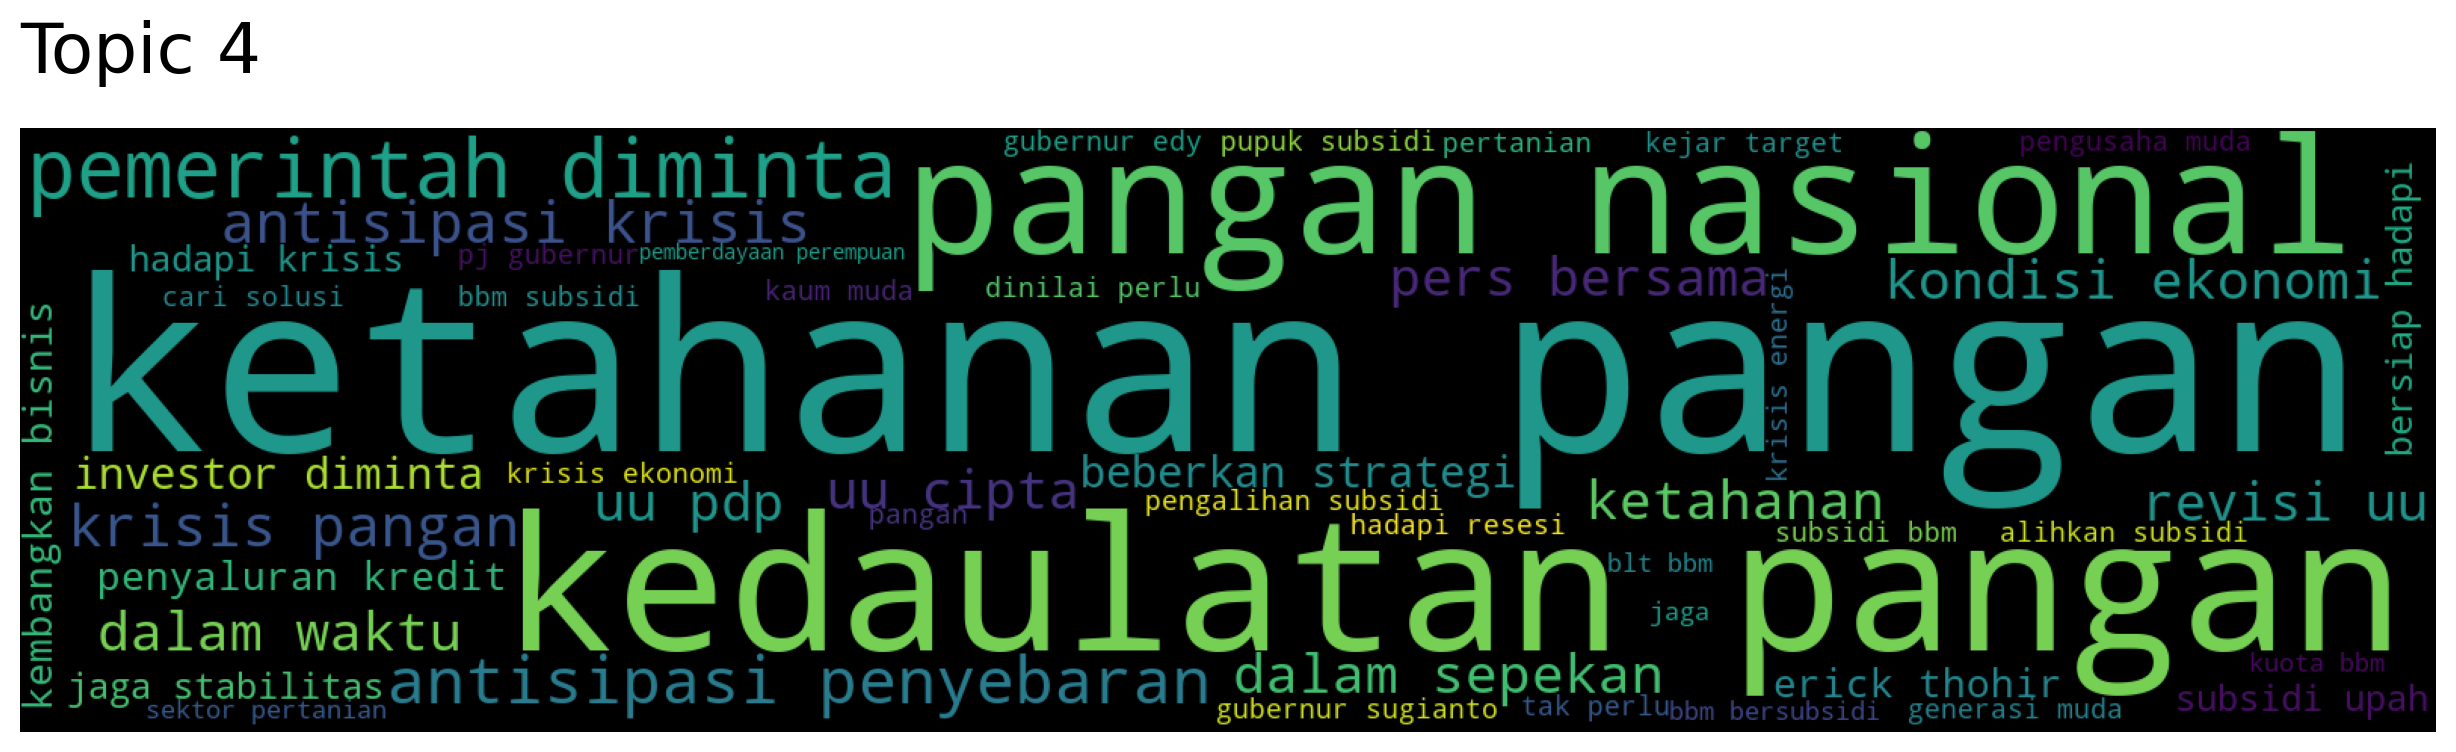

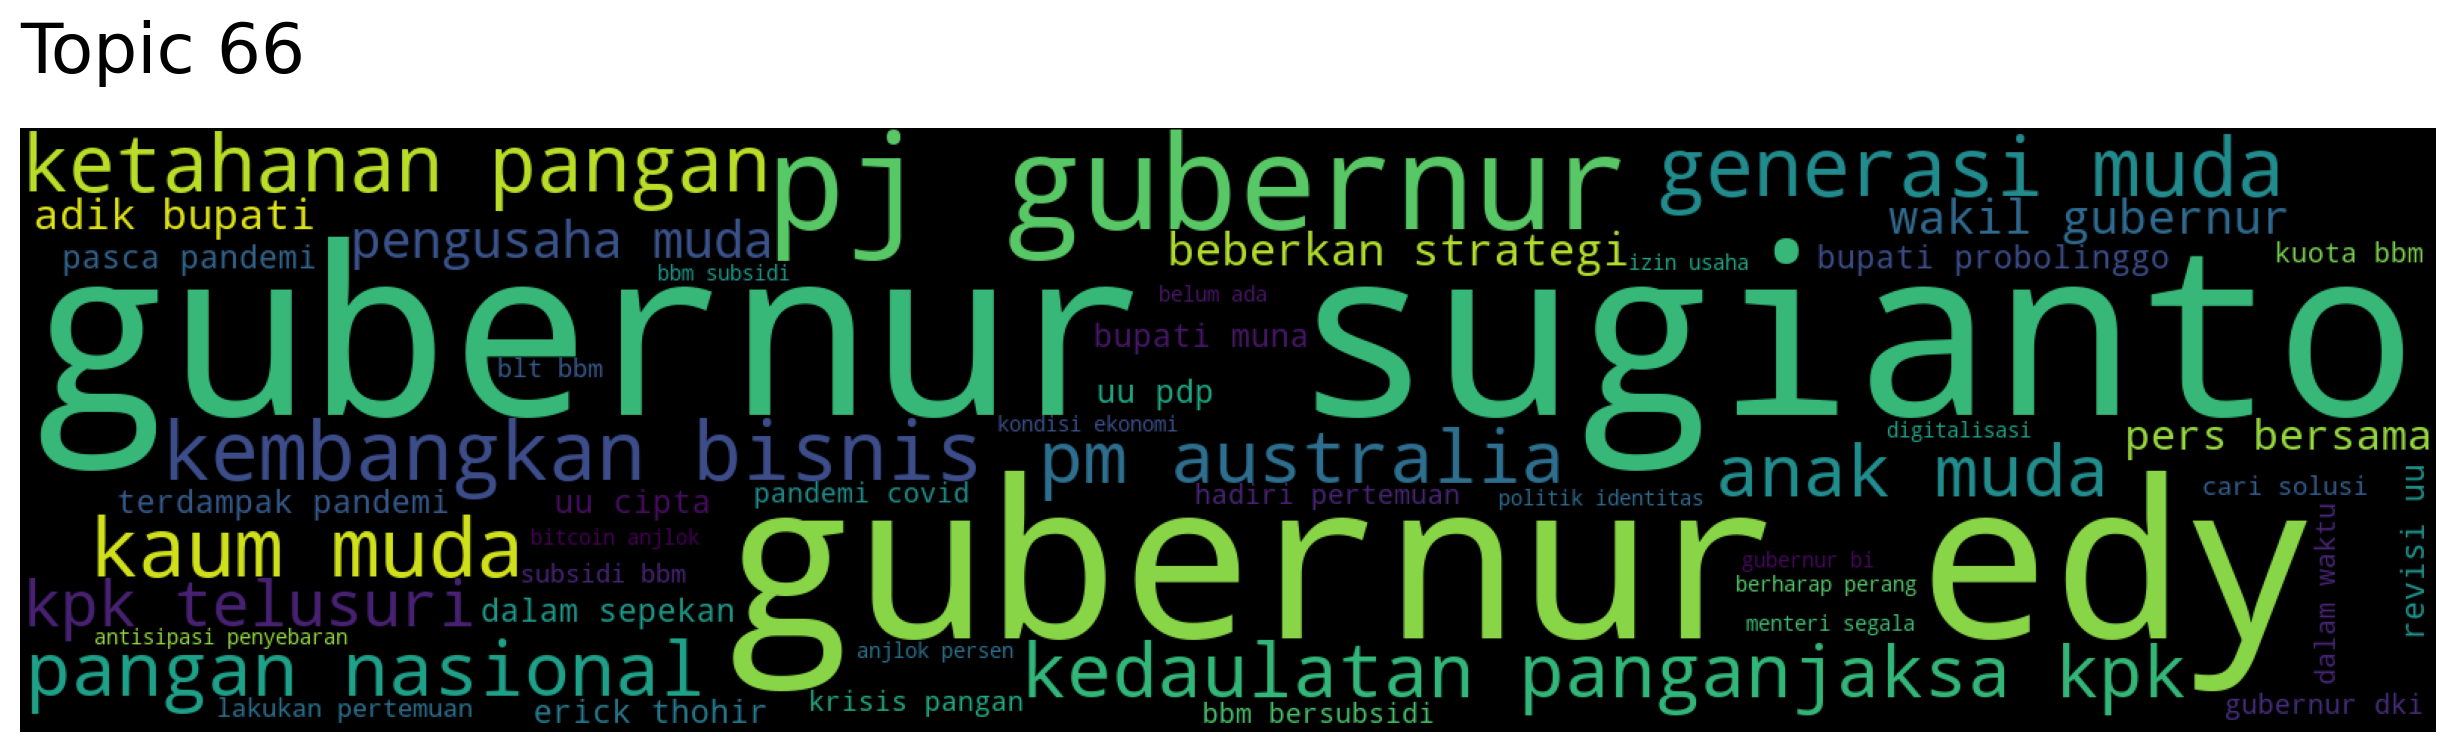

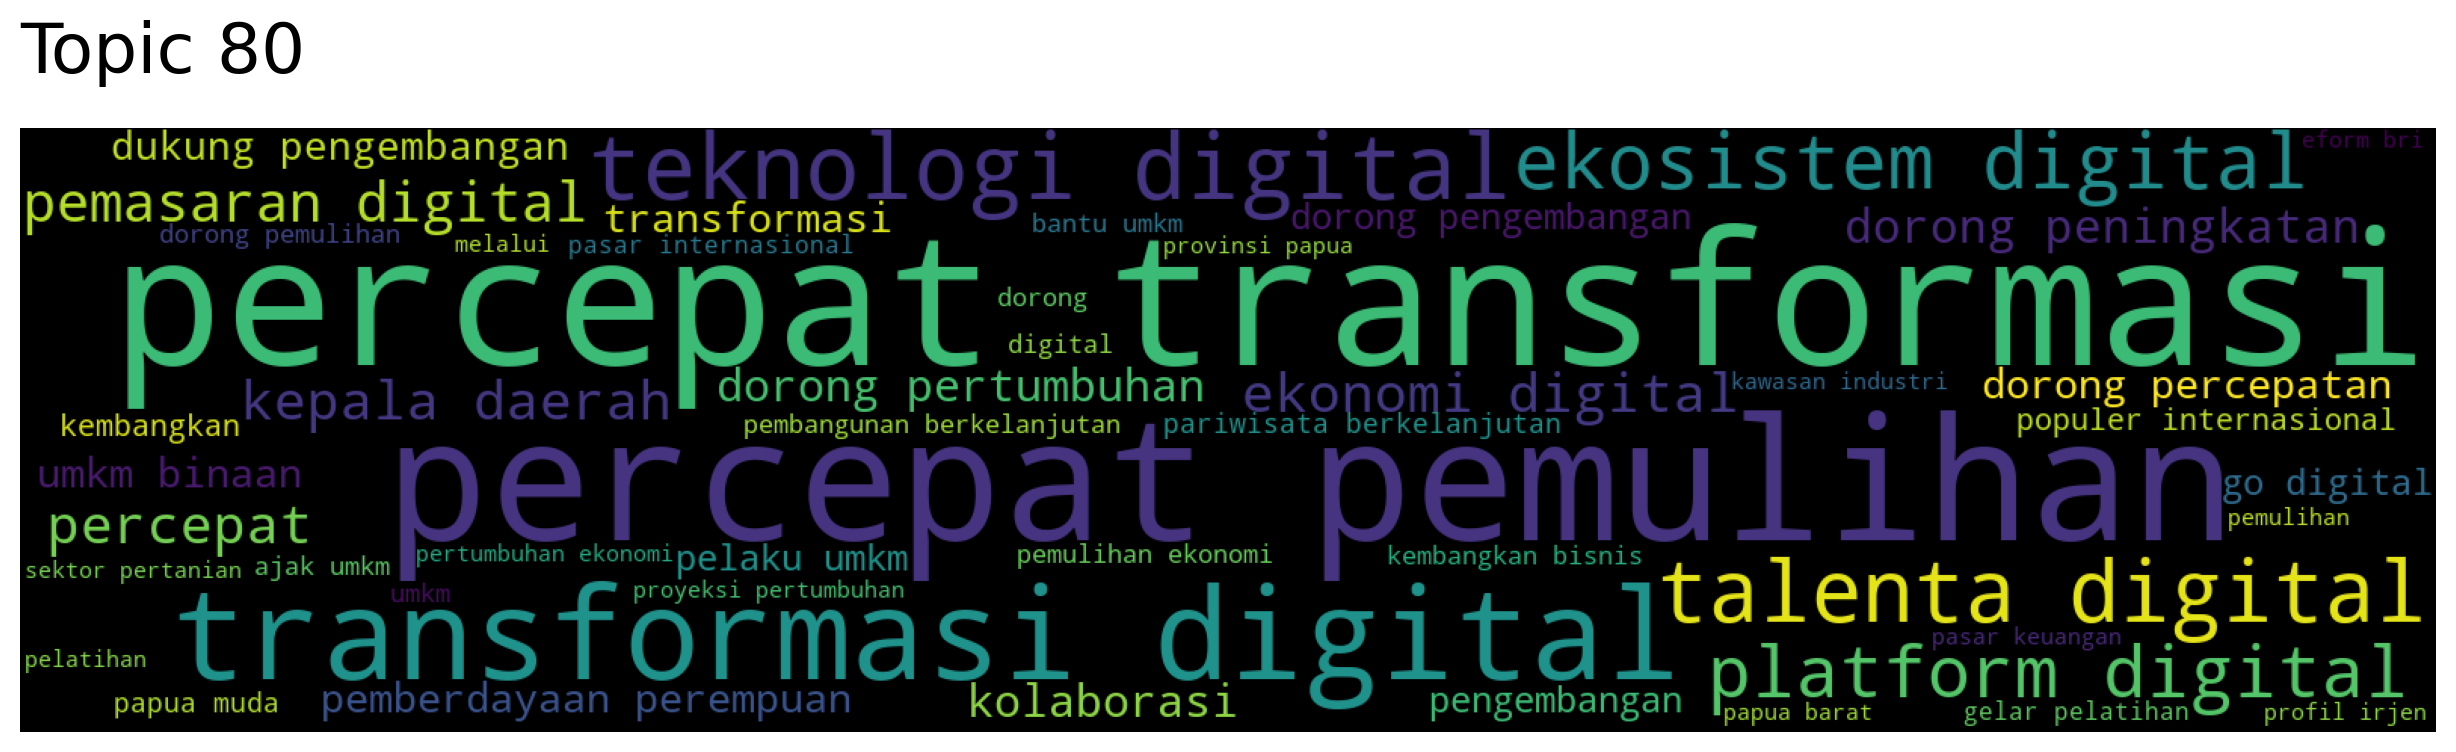

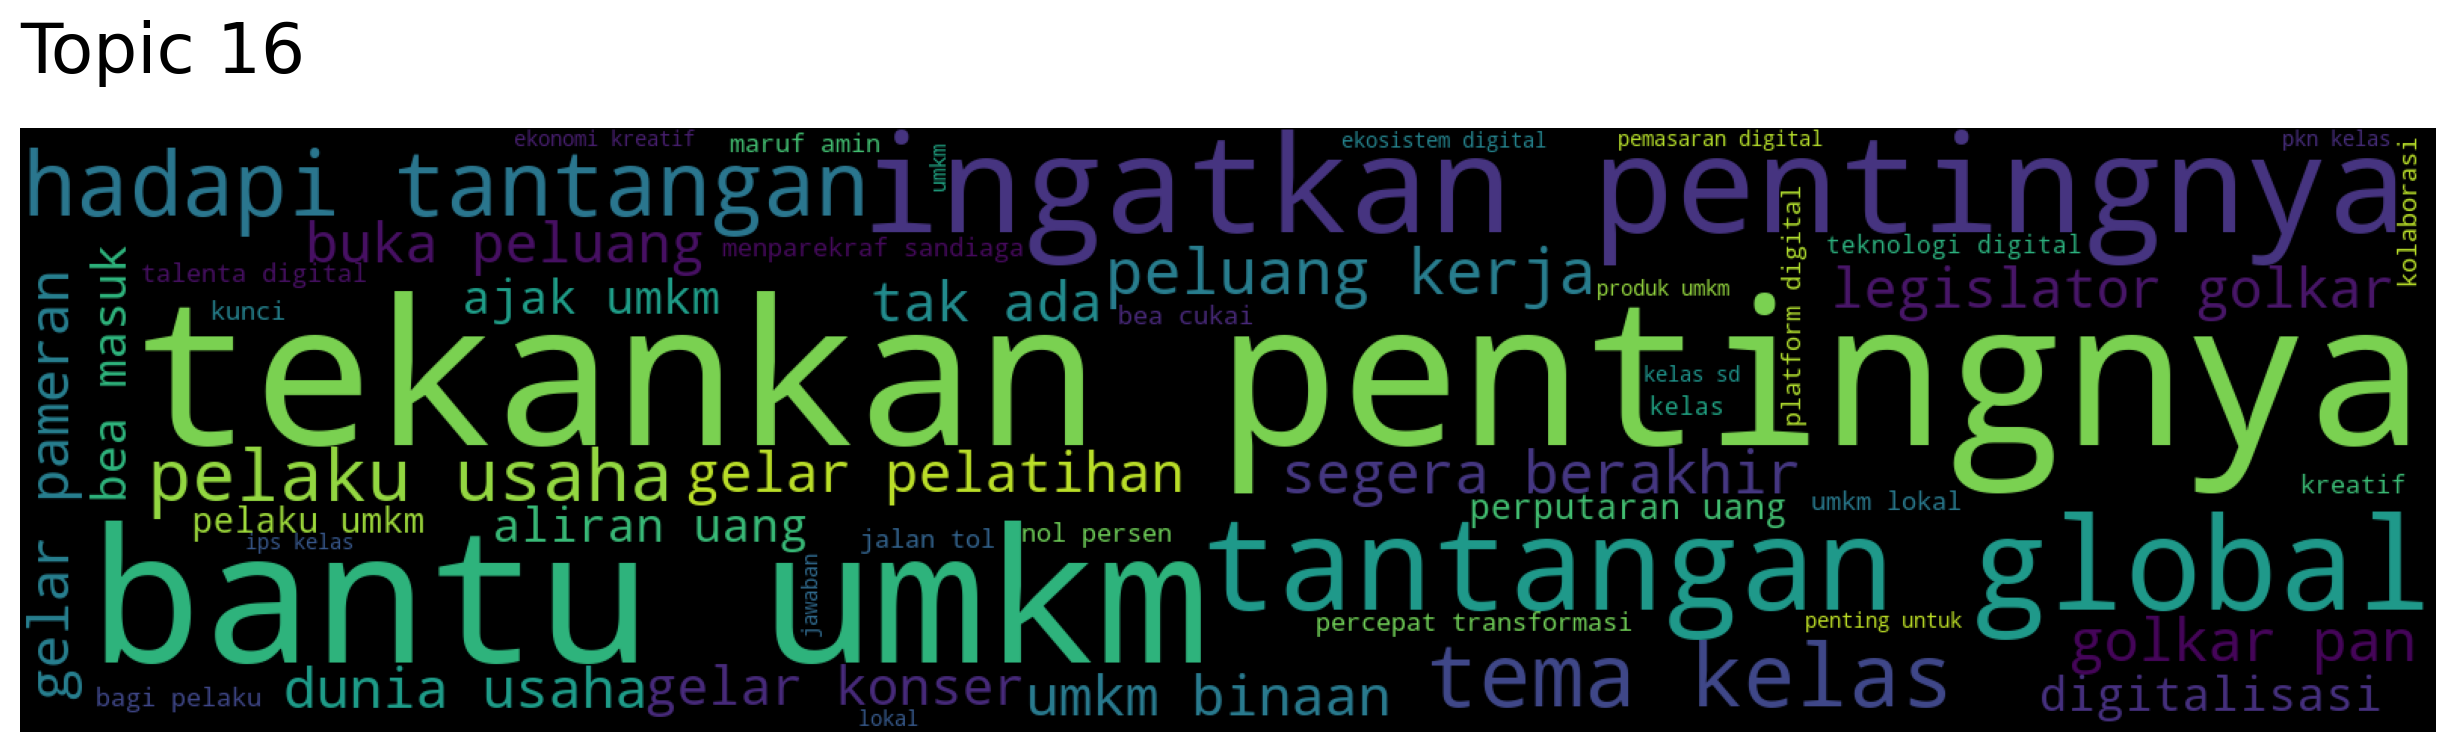

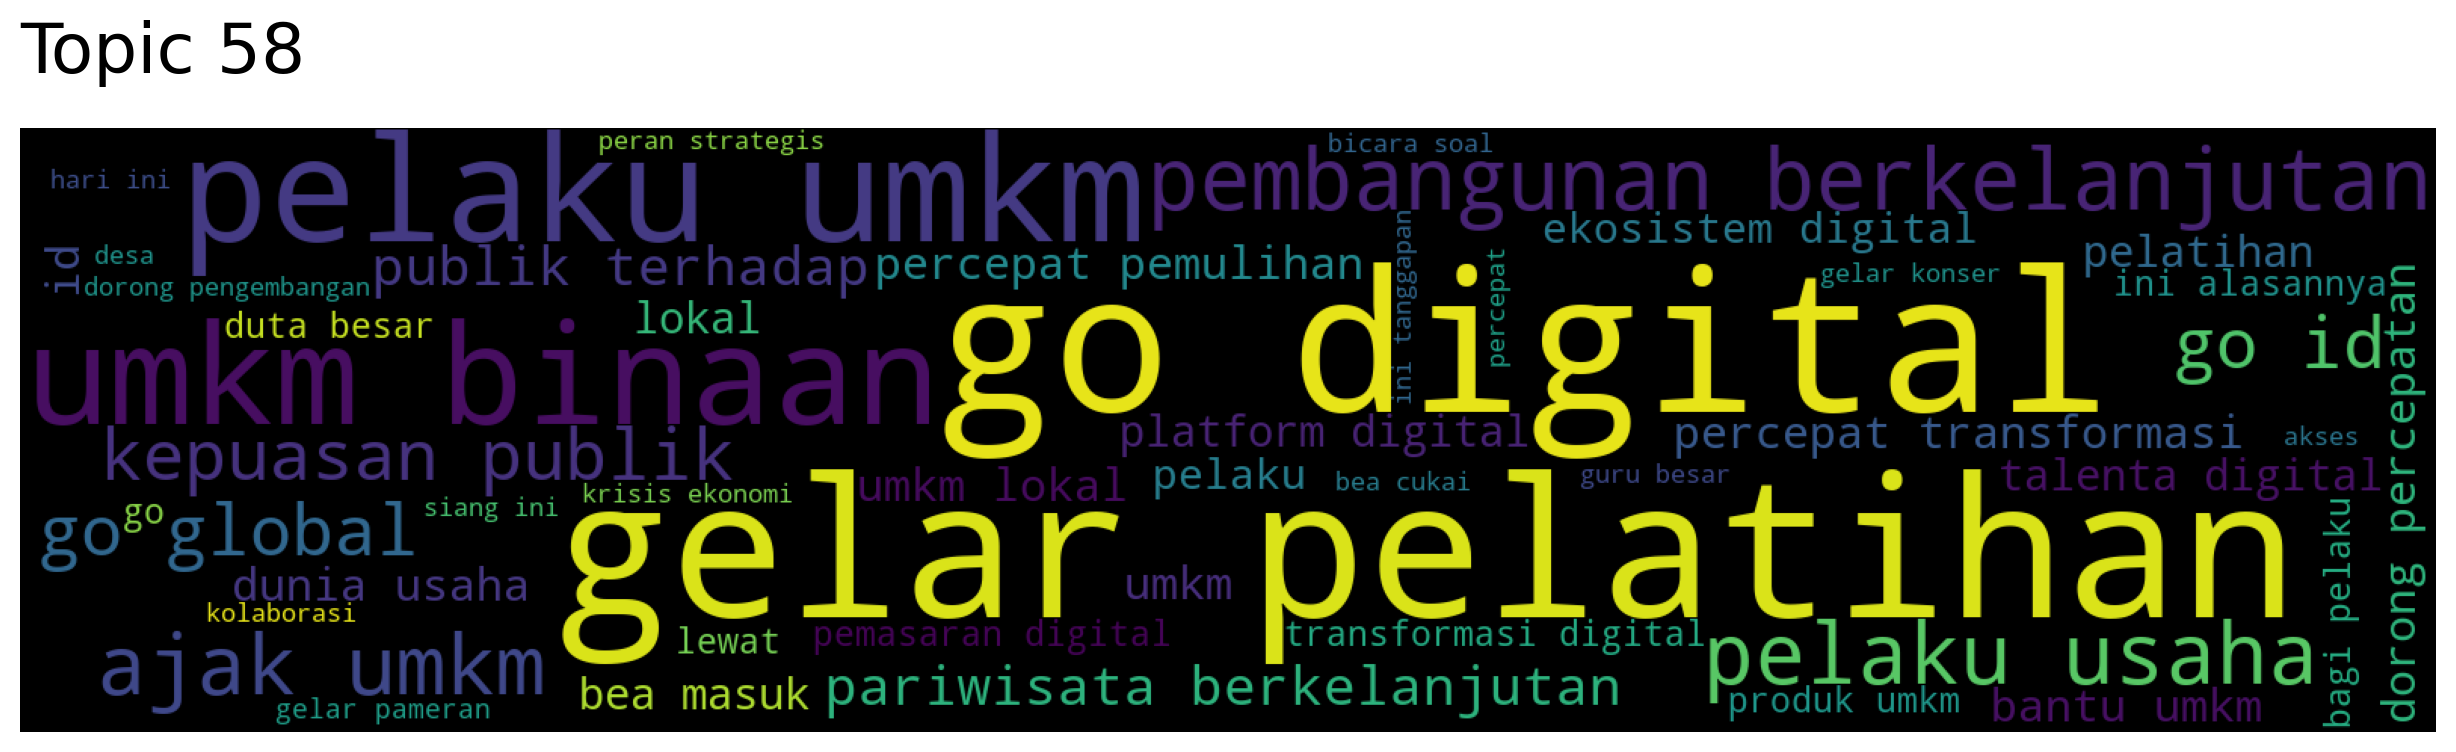

In [56]:
topic_words, word_scores, topic_scores, topic_nums = topic_model.search_topics(keywords=["ekonomi"], num_topics=5)
for topic in topic_nums:
    topic_model.generate_topic_wordcloud(topic)

In [27]:
topic_words, word_scores, topic_nums = topic_model.get_topics(10)
for words, scores, nums in zip(topic_words, word_scores, topic_nums):
  print("Topic Number: ",nums)
  print(f"Words: {words}")
  print("\n")



Topic Number:  0
Words: ['kuota bbm' 'subsidi bbm' 'blt bbm' 'bbm bersubsidi' 'harga bbm'
 'bbm subsidi' 'harga pertalite' 'pengalihan subsidi' 'alihkan subsidi'
 'subsidi upah' 'harga keekonomian' 'bbm naik' 'lonjakan harga'
 'pupuk subsidi' 'harga tbs' 'penyesuaian harga' 'harga pertamax'
 'harga bitcoin' 'kenaikan harga' 'pertalite naik' 'turunkan harga'
 'subsidi minyak' 'naiknya harga' 'pembelian pertalite'
 'konsumsi pertalite' 'tepat sasaran' 'harga tiket' 'dampak kenaikan'
 'beli pertalite' 'dinilai tepat' 'listrik naik' 'belum ada' 'sudah tepat'
 'tak mau' 'kenaikan tarif' 'tak kunjung' 'tak boleh' 'pertalite'
 'ekonom indef' 'naikkan harga' 'bitcoin anjlok' 'pemerintah kaji' 'tepat'
 'harga minyak' 'tolak kenaikan' 'bbm' 'pengamat sarankan' 'subsidi'
 'harga bahan' 'rencana kenaikan']


Topic Number:  1
Words: ['suku bunga' 'bunga the' 'karangan bunga' 'pertahankan suku' 'tahan suku'
 'kerek suku' 'bunga acuan' 'the fed' 'of the' 'kenaikan suku' 'bunga'
 'naikkan suku' 'acuan

In [29]:
topic_words, word_scores

(array([['kuota bbm', 'subsidi bbm', 'blt bbm', 'bbm bersubsidi',
         'harga bbm', 'bbm subsidi', 'harga pertalite',
         'pengalihan subsidi', 'alihkan subsidi', 'subsidi upah',
         'harga keekonomian', 'bbm naik', 'lonjakan harga',
         'pupuk subsidi', 'harga tbs', 'penyesuaian harga',
         'harga pertamax', 'harga bitcoin', 'kenaikan harga',
         'pertalite naik', 'turunkan harga', 'subsidi minyak',
         'naiknya harga', 'pembelian pertalite', 'konsumsi pertalite',
         'tepat sasaran', 'harga tiket', 'dampak kenaikan',
         'beli pertalite', 'dinilai tepat', 'listrik naik', 'belum ada',
         'sudah tepat', 'tak mau', 'kenaikan tarif', 'tak kunjung',
         'tak boleh', 'pertalite', 'ekonom indef', 'naikkan harga',
         'bitcoin anjlok', 'pemerintah kaji', 'tepat', 'harga minyak',
         'tolak kenaikan', 'bbm', 'pengamat sarankan', 'subsidi',
         'harga bahan', 'rencana kenaikan'],
        ['suku bunga', 'bunga the', 'karangan

## Creating Topic Wordclouds

## Accessing Topic Vectors

In [59]:
topic_model.topic_vectors[1]

array([ 9.34834257e-02,  5.64177074e-02, -7.14379475e-02, -1.65302977e-02,
       -2.18923036e-02,  3.28298621e-02, -3.67388614e-02,  1.90660786e-02,
        9.59922373e-03, -2.88889036e-02,  4.76880707e-02, -2.44044978e-02,
        6.03097267e-02, -1.04542315e-01, -3.23033668e-02,  4.98426817e-02,
        3.43854651e-02,  3.36224101e-02, -3.60699743e-02, -7.53177330e-02,
        2.02857833e-02, -1.51030153e-01, -1.92615259e-02, -4.38004546e-02,
       -6.65791566e-03, -9.85881761e-02, -9.44388211e-02,  4.30273637e-03,
       -1.06322039e-02, -9.68384743e-03, -7.84171671e-02, -3.44678550e-03,
       -4.45088781e-02, -3.13395672e-02,  3.08317486e-02,  8.17388594e-02,
        1.56806838e-02,  1.15459068e-02,  4.22874419e-03,  1.05831876e-01,
       -6.36191433e-03,  7.20234169e-03,  2.66372226e-02, -1.73221342e-02,
        2.77133845e-02,  1.21225715e-02,  4.00889441e-02,  1.72485746e-02,
       -2.33904067e-02,  2.59215701e-02, -7.50593990e-02, -2.05092169e-02,
        8.59920830e-02,  

In [51]:
model.topic_vectors[1]

array([-1.62523445e-02,  7.64651522e-02,  7.48587598e-04, -3.35607417e-02,
        7.58693069e-02, -1.74914151e-02,  2.80426797e-02,  5.04753226e-03,
        6.06036372e-02, -1.32534146e-01, -8.90653208e-02, -6.44386234e-03,
       -1.33643761e-01, -7.95729533e-02, -2.54132953e-02,  2.65401192e-02,
        3.96806635e-02, -7.00439736e-02, -4.87447232e-02, -5.05168028e-02,
       -2.40584724e-02,  6.47246614e-02, -1.00171968e-01,  7.63706937e-02,
       -9.53499302e-02,  2.21189726e-02, -1.12192050e-01, -4.06448990e-02,
        8.96664038e-02,  1.76890176e-02, -5.50412126e-02,  6.58800527e-02,
        8.77614170e-02,  9.41619277e-03,  6.38582278e-03,  3.39805782e-02,
       -1.01274671e-02,  1.24297112e-01,  9.99570563e-02,  1.12218976e-01,
        3.49329598e-02,  5.79083636e-02, -3.46038118e-02, -1.31778343e-05,
        1.11196443e-01, -3.80794592e-02, -8.96947924e-03,  6.79431707e-02,
       -1.80128310e-02, -5.25888093e-02, -7.16250315e-02, -4.43690419e-02,
        5.17042466e-02,  

## Searching for Topics by Keyword

In [139]:
model.topic_vectors[2]

array([-0.05987567,  0.03048541,  0.06677777, -0.00282047,  0.05753009,
       -0.00076479,  0.02980345, -0.00024088,  0.06286105,  0.02004529,
       -0.05028285,  0.04351353, -0.03442965, -0.0690247 , -0.09037737,
        0.02041218,  0.07992703, -0.01292331, -0.00565479, -0.0443127 ,
       -0.01800707,  0.03184475, -0.00074915, -0.00952321, -0.02174123,
        0.05085366, -0.03676398, -0.06559481, -0.09767148, -0.01141708,
       -0.06351122,  0.0616816 ,  0.06015137,  0.0410364 ,  0.08401112,
        0.00295607,  0.01557887,  0.01242107,  0.00213895,  0.07823875,
       -0.02356894, -0.04284229,  0.02591791, -0.03824086,  0.04290412,
        0.01239573, -0.0462926 ,  0.11734059,  0.11478454,  0.12019529,
        0.03063997,  0.00301356, -0.01491262,  0.03805057, -0.08971932,
       -0.02623042, -0.00814473, -0.07350536, -0.04128742, -0.05653934,
        0.0086881 , -0.07733633,  0.08110832,  0.12380917, -0.03739705,
       -0.0273304 , -0.07303609,  0.00798988,  0.03308998, -0.05

In [30]:
topic_words, word_scores, topic_scores, topic_nums = topic_model.search_topics(keywords=["ekonomi"], num_topics=10)

In [31]:
topic_words, topic_scores, topic_nums, word_scores, topic_sizes

([array(['ketahanan pangan', 'kedaulatan pangan', 'pangan nasional',
         'pemerintah diminta', 'antisipasi krisis', 'antisipasi penyebaran',
         'jaga stabilitas', 'ketahanan', 'kondisi ekonomi', 'daya tarik',
         'daya saing', 'sumber daya', 'tingkatkan daya',
         'kembangkan bisnis', 'bawah laut', 'krisis pangan', 'daya beli',
         'uu pdp', 'investor diminta', 'uu cipta', 'pers bersama',
         'revisi uu', 'tak perlu', 'langkah pemerintah', 'sektor pertanian',
         'ruang laut', 'laut sedunia', 'laut hitam', 'pangan',
         'bersiap hadapi', 'cari solusi', 'hadapi krisis',
         'beberkan strategi', 'energi bersih', 'dinilai perlu',
         'gubernur bi', 'pupuk subsidi', 'penyaluran kredit', 'bbm subsidi',
         'subsidi upah', 'alihkan subsidi', 'pengalihan subsidi',
         'energi terbarukan', 'energi hijau', 'subsidi bbm',
         'transisi energi', 'dalam waktu', 'dorong pertumbuhan', 'jaga',
         'gubernur sugianto'], dtype='<U25

In [33]:
topic_words, word_scores, topic_scores, topic_nums = topic_model.search_topics(keywords=["ekonomi"], num_topics=10)

In [34]:
topic_words, topic_scores

([array(['ketahanan pangan', 'kedaulatan pangan', 'pangan nasional',
         'pemerintah diminta', 'antisipasi krisis', 'antisipasi penyebaran',
         'jaga stabilitas', 'ketahanan', 'kondisi ekonomi', 'daya tarik',
         'daya saing', 'sumber daya', 'tingkatkan daya',
         'kembangkan bisnis', 'bawah laut', 'krisis pangan', 'daya beli',
         'uu pdp', 'investor diminta', 'uu cipta', 'pers bersama',
         'revisi uu', 'tak perlu', 'langkah pemerintah', 'sektor pertanian',
         'ruang laut', 'laut sedunia', 'laut hitam', 'pangan',
         'bersiap hadapi', 'cari solusi', 'hadapi krisis',
         'beberkan strategi', 'energi bersih', 'dinilai perlu',
         'gubernur bi', 'pupuk subsidi', 'penyaluran kredit', 'bbm subsidi',
         'subsidi upah', 'alihkan subsidi', 'pengalihan subsidi',
         'energi terbarukan', 'energi hijau', 'subsidi bbm',
         'transisi energi', 'dalam waktu', 'dorong pertumbuhan', 'jaga',
         'gubernur sugianto'], dtype='<U25

## Searching for Documents by Topic

In [28]:
documents, document_scores, document_ids = topic_model.search_documents_by_topic(topic_num=0, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 208, Score: 0.8405656218528748
-----------
di indonesia harga pertalite diisukan naik pemerintah malaysia malah turunkan harga bbm
-----------

Document: 6965, Score: 0.8047648668289185
-----------
harga kedelai tak terkendali psi desak pemerintah selamatkan perajin tempetahu
-----------

Document: 12493, Score: 0.7969554662704468
-----------
waspadai risiko buruk stagflasi harga komoditas andalan ribisa jatuh
-----------

Document: 352, Score: 0.7923440337181091
-----------
pengamat sebut harga bbm non subsidi hanya trik pemerintah redam gejolak
-----------

Document: 45, Score: 0.7910588383674622
-----------
awan gelap subsidi habis
-----------

Document: 292, Score: 0.7838628888130188
-----------
kenaikan harga bbm turunkan tingkat hunian hotel dan konsumsi oleholeh
-----------

Document: 12492, Score: 0.783137857913971
-----------
waspadai risiko buruk stagflasi harga komoditas andalan ribisa jatuh
-----------

Document: 336, Score: 0.7829332947731018
-----------
pemerint

In [55]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=20)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8458, Score: 0.7066053748130798
-----------
tribunnews.com jakarta kapolri jenderal polisi listyo sigit prabowo akan mengumumkan langsung tersangka baru dalam kasus pembunuhan brigadir nofriansyah yosua hutabarat alias brigadir j. kadiv humas polri irjen pol dedi prasetyo menyebut pengumunan tersangka baru akan disampaikan langsung oleh kapolri pada selasa sore nanti. ya nanti sore pak kapolri langsung yang akan sampaikan kata dedi prasetyo saat dihubungi selasa . meski begitu dedi prasetyo belum memastikan waktu pengumuman tersangka baru dalam kasus tersebut. dimungkinkan pengumunan itu dilakukan di atas pukul wib. lalu siapa yang akan menjadi tersangka ketiga dalam kasus ini setelah sebelumnya bharada e dan brigadir rr ditetapkan sebagai tersangka menteri koordinator bidang politik hukum dan keamanan polhukam mahfud md mengatakan pengusutan kematian brigadir nofriansyah yosua hutabarat alias brigadir j di rumah dinas irjen ferdy sambo akan terus berkembang. jumlah pelaku ke

## Reducing the Number of Topics

In [56]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=30)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 8458, Score: 0.7066053748130798
-----------
tribunnews.com jakarta kapolri jenderal polisi listyo sigit prabowo akan mengumumkan langsung tersangka baru dalam kasus pembunuhan brigadir nofriansyah yosua hutabarat alias brigadir j. kadiv humas polri irjen pol dedi prasetyo menyebut pengumunan tersangka baru akan disampaikan langsung oleh kapolri pada selasa sore nanti. ya nanti sore pak kapolri langsung yang akan sampaikan kata dedi prasetyo saat dihubungi selasa . meski begitu dedi prasetyo belum memastikan waktu pengumuman tersangka baru dalam kasus tersebut. dimungkinkan pengumunan itu dilakukan di atas pukul wib. lalu siapa yang akan menjadi tersangka ketiga dalam kasus ini setelah sebelumnya bharada e dan brigadir rr ditetapkan sebagai tersangka menteri koordinator bidang politik hukum dan keamanan polhukam mahfud md mengatakan pengusutan kematian brigadir nofriansyah yosua hutabarat alias brigadir j di rumah dinas irjen ferdy sambo akan terus berkembang. jumlah pelaku ke

In [59]:
topic_mapping = topic_model.hierarchical_topic_reduction(num_topics=10)

In [60]:
topic_mapping

[[100,
  31,
  115,
  72,
  130,
  64,
  68,
  23,
  81,
  10,
  118,
  48,
  70,
  28,
  71,
  124,
  11,
  17,
  18,
  53,
  6],
 [55,
  107,
  14,
  111,
  9,
  4,
  43,
  45,
  98,
  12,
  32,
  86,
  87,
  123,
  37,
  95,
  74,
  126,
  51,
  92,
  66,
  60,
  112,
  2],
 [82, 120, 85, 67, 91, 88, 59, 129, 69, 93, 44, 56, 34],
 [63, 103, 116, 113, 30, 24, 96, 131, 73, 106, 15, 128, 22, 36, 8],
 [41, 42, 40, 58, 33, 84, 0],
 [78, 109, 110, 16, 57, 117, 83, 19],
 [38, 102, 1],
 [76,
  35,
  21,
  50,
  121,
  125,
  5,
  90,
  97,
  39,
  13,
  104,
  79,
  127,
  89,
  49,
  99,
  108,
  75],
 [62, 7, 3, 114, 27, 29, 119, 80, 61, 46, 25, 65, 20],
 [122, 101, 77, 47, 52, 54, 105, 94, 26]]

In [87]:
topic_mapping = topic_model.hierarchical_topic_reduction(num_topics=10)

In [88]:
topic_model.topic_words_reduced

array([['momentum kebangkitan', 'jadi momentum', 'dorong pertumbuhan',
        'uno dorong', 'dorong pengembangan', 'ketahanan pangan',
        'dukung pengembangan', 'teknologi digital', 'dorong percepatan',
        'sektor transportasi', 'umkm lokal', 'dorong pemulihan',
        'kerja sama', 'dorong peningkatan', 'ruang laut', 'erick thohir',
        'laut sedunia', 'sama dengan', 'sektor properti', 'laut hitam',
        'tingkatkan daya', 'ajak umkm', 'sandiaga uno',
        'proyeksi pertumbuhan', 'airlangga hartarto',
        'antisipasi penyebaran', 'sektor pertanian', 'syl ajak',
        'produk lokal', 'perubahan iklim', 'antisipasi krisis',
        'daya saing', 'daya tarik', 'ajak masyarakat',
        'politik identitas', 'kembangkan bisnis', 'jaga stabilitas',
        'sumber daya', 'tingkatkan perekonomian', 'pertumbuhan ekonomi',
        'hut ri', 'ajak pemuda', 'dinilai perlu', 'revisi uu',
        'uu cipta', 'bawah laut', 'bahas isu', 'uu pdp',
        'pangan nasional

In [89]:
word_scores

array([0.53974794, 0.50976078, 0.48585867, 0.47918333, 0.44814868])

In [76]:
words, word_scores = topic_model.similar_words(keywords=["ekonomi"], keywords_neg=[], num_words=5)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

resesi 0.5397479412466964
global 0.5097607786257055
nasional 0.4858586744040582
pandemi 0.4791833294163646
pertumbuhan 0.4481486777736868


In [51]:
doc_topics = topic_model.get_documents_topics([82]) 

In [52]:
import seaborn as sns
   


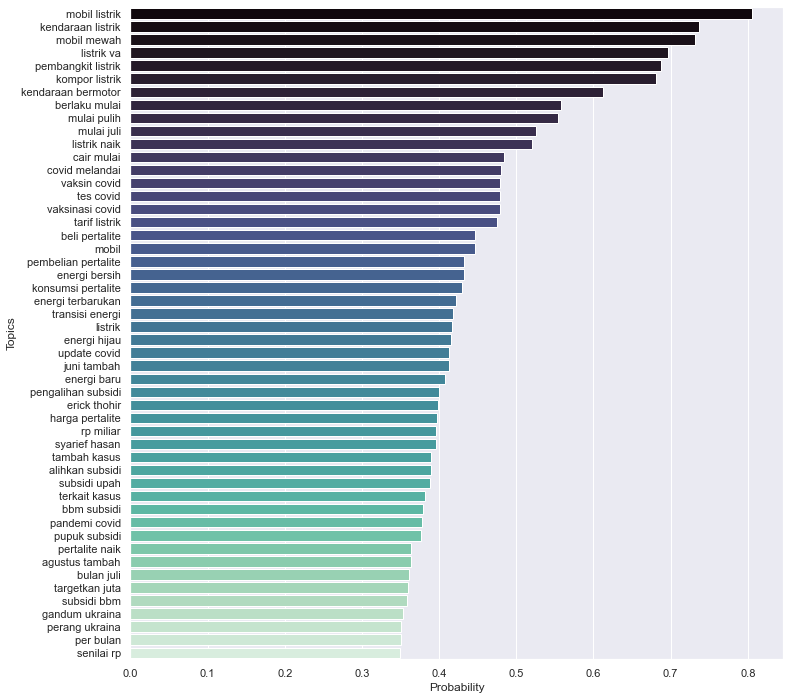

In [53]:
topic_names = doc_topics[2]
topic_probs = doc_topics[3]
df_topics = pd.DataFrame(topic_names).transpose().rename(columns={0 : "Topics"})
df_probs = pd.DataFrame(topic_probs).transpose().rename(columns={0 : "Probability"})
df = pd.concat([df_topics, df_probs], axis=1)
   
sns.set(rc={'figure.figsize':(11.7,12)})
   
ax = sns.barplot(x="Probability", y="Topics", data=df, palette="mako")

In [126]:
from nltk.probability import FreqDist
import math
import pickle
from top2vec import Top2Vec
import numpy as np
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags
from tqdm import tqdm


def default_tokenizer(doc):
    # This part was copied from Top2Vec tokenizer, if you are using a specific tokenizer you should not use the default one when computing the measure
    """Tokenize documents for training and remove too long/short words"""
    return simple_preprocess(strip_tags(doc), deacc=True)


def PWI(model, docs, num_topics=10, num_words=20):
    """
    :param model: top2vec model
    :param docs: list of strings
    :param num_topics: number of topics to use in the computation
    :param num_words: number of words to use
    :return: PWI value
    """

    topic_model.hierarchical_topic_reduction(num_topics)

    # This is used to tokenize the data and strip tags (as done in top2vec)
    tokenized_data = [default_tokenizer(doc) for doc in docs]
    # Computing all the word frequencies
    # First I concatenate all the documents and use FreqDist to compute the frequency of each word
    word_frequencies = FreqDist(np.concatenate(tokenized_data))

    # Computing the frequency of words per document
    # Remember to change the tokenizer if you are using a different one to train the model
    dict_docs_freqs = {}
    for i, doc in enumerate(tqdm(docs)):
        counter_dict = FreqDist(default_tokenizer(doc))
        if i not in dict_docs_freqs:
            dict_docs_freqs[i] = counter_dict

    PWI = 0.25
    p_d = 1 / len(docs)
    # This will iterate through the whole dataset and query the topics of each document.
    for i, doc in enumerate(tqdm(docs)):
        topic_words, word_scores, topic_scores, topic_nums = topic_model.query_topics(query=doc, num_topics=num_topics,
                                                                                reduced=True)
        # Words of the topic
        # Topic scores is the topic importance for that document
        for words, t_score in zip(topic_words, topic_scores):
            for word in words[:num_words]:
                if word not in dict_docs_freqs[i]:
                    # This is added just for some specific cases when we are using different collection to test
                    continue
                # P(d,w) = P(d|w) * p(w)
                p_d_given_w = dict_docs_freqs[i].freq(word)
                p_w = word_frequencies.freq(word)
                p_d_and_w = p_d_given_w * p_w
                left_part = p_d_given_w * t_score
                PWI += left_part * math.log(p_d_and_w / (p_w * p_d))
    return PWI

if __name__ == '__main__':

    
    # Training the model as presented in the original github repository
    topic_model = Top2Vec(
    skripsib, 
    speed="deep-learn"
    
    )
    
    # Dumping the model
    # pickle.dump(model, open('top2vec-20news.pkl', 'wb'))

    # Loading model
    # model = pickle.load(open('top2vec-20news.pkl', 'rb'))

    print("PWI:", PWI(model=topic_model, docs=skripsib, num_topics=10, num_words=10))

2023-01-25 20:47:21,476 - top2vec - INFO - Pre-processing documents for training
2023-01-25 20:47:22,371 - top2vec - INFO - Creating joint document/word embedding
2023-01-25 20:52:55,903 - top2vec - INFO - Creating lower dimension embedding of documents
2023-01-25 20:53:23,219 - top2vec - INFO - Finding dense areas of documents
2023-01-25 20:53:25,044 - top2vec - INFO - Finding topics
100%|███████████████████████████████████████████████████████████████████████████| 12553/12553 [01:24<00:00, 147.93it/s]

PWI: 2353.670105241657


In [129]:
from nltk.probability import FreqDist
import math
import pickle
from top2vec import Top2Vec
import numpy as np
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags
from tqdm import tqdm


def default_tokenizer(doc):
    # This part was copied from Top2Vec tokenizer, if you are using a specific tokenizer you should not use the default one when computing the measure
    """Tokenize documents for training and remove too long/short words"""
    return simple_preprocess(strip_tags(doc), deacc=True)


def PWI(model, docs, num_topics=10, num_words=20):
    """
    :param model: top2vec model
    :param docs: list of strings
    :param num_topics: number of topics to use in the computation
    :param num_words: number of words to use
    :return: PWI value
    """

    topic_model.hierarchical_topic_reduction(num_topics)

    # This is used to tokenize the data and strip tags (as done in top2vec)
    tokenized_data = [default_tokenizer(doc) for doc in docs]
    # Computing all the word frequencies
    # First I concatenate all the documents and use FreqDist to compute the frequency of each word
    word_frequencies = FreqDist(np.concatenate(tokenized_data))

    # Computing the frequency of words per document
    # Remember to change the tokenizer if you are using a different one to train the model
    dict_docs_freqs = {}
    for i, doc in enumerate(tqdm(docs)):
        counter_dict = FreqDist(default_tokenizer(doc))
        if i not in dict_docs_freqs:
            dict_docs_freqs[i] = counter_dict

    PWI = 0.25
    p_d = 1 / len(docs)
    # This will iterate through the whole dataset and query the topics of each document.
    for i, doc in enumerate(tqdm(docs)):
        topic_words, word_scores, topic_scores, topic_nums = topic_model.query_topics(query=doc, num_topics=num_topics,
                                                                                reduced=True)
        # Words of the topic
        # Topic scores is the topic importance for that document
        for words, t_score in zip(topic_words, topic_scores):
            for word in words[:num_words]:
                if word not in dict_docs_freqs[i]:
                    # This is added just for some specific cases when we are using different collection to test
                    continue
                # P(d,w) = P(d|w) * p(w)
                p_d_given_w = dict_docs_freqs[i].freq(word)
                p_w = word_frequencies.freq(word)
                p_d_and_w = p_d_given_w * p_w
                left_part = p_d_given_w * t_score
                PWI += left_part * math.log(p_d_and_w / (p_w * p_d))
    return PWI

if __name__ == '__main__':

    
    # Training the model as presented in the original github repository
    topic_model = Top2Vec(
    skripsib, 
    speed="deep-learn"
    
    )
    
    # Dumping the model
    # pickle.dump(model, open('top2vec-20news.pkl', 'wb'))

    # Loading model
    # model = pickle.load(open('top2vec-20news.pkl', 'rb'))

    print("PWI:", PWI(model=topic_model, docs=skripsib, num_topics=10, num_words=20))

2023-01-25 21:02:07,260 - top2vec - INFO - Pre-processing documents for training
2023-01-25 21:02:08,365 - top2vec - INFO - Creating joint document/word embedding
2023-01-25 21:08:07,232 - top2vec - INFO - Creating lower dimension embedding of documents
2023-01-25 21:08:23,101 - top2vec - INFO - Finding dense areas of documents
2023-01-25 21:08:24,135 - top2vec - INFO - Finding topics
100%|███████████████████████████████████████████████████████████████████████████| 12553/12553 [00:38<00:00, 324.06it/s]

PWI: 4371.614271695091


In [124]:
import nltk
from nltk import ngrams, FreqDist
from gensim.utils import tokenize
#Create marginal probability distribution for all terms in set of documents
freq_dist = FreqDist()

tokenized = [list(tokenize(s)) for s in skripsib]

for doc in tokenized:
    for word in doc:
        freq_dist[word.lower()] += 1
        #Store total number of documents
N = len(skripsib)
pattern = r'\w+'
#Store total frequency of all terms in document set
F = sum([len(nltk.regexp_tokenize(doc, pattern)) for doc in skripsib])

#Probability of dj is all 1/all documents
P_dj = (1 / N)
#print(f'P_dj {P_dj}: 1 / N {N}')
#Iterate over all documents
dj_wi_pwi_list = []
for d in skripsib:
    #Store PWIs to sum
    #Initiate list for storing PWI values per word for total score of topic
    words_in_t = []
    #Iterate over n topic words
    fake_topic_words = ["covid","vaksin","corona","politik","hidup","pemerintah",
                        "vaksinasi","yang","dimana","dan","untuk","oleh","karena","sebab","rp","tak","ada",
                        "jadi","me","di","ke","dari","an","eng","tidak","aku","kamu","vaksinasi","pmk","akhir","awal","punya",
                       "akan","tetapi","misal","ini"]
    for word in fake_topic_words:
        #print('word:==========', word)
        #print(d)
        tokenized_doc = [x.lower() for x in list(nltk.regexp_tokenize(d, pattern))] #Should this be a set?
        
        #print(f'TOKENIZED_DOC:{tokenized_doc}\n')

        f_ij = sum([1 for x in tokenized_doc if word==x])
        P_wi_dj = (f_ij / F)
        #print(f'P_wi_dj:{P_wi_dj} = (f_ij {f_ij} / F {F})\n')
        if P_wi_dj == 0:
            continue
        
        P_wi = freq_dist.freq(word)

        pmi = np.log(P_wi_dj/(P_wi * P_dj))
        #print(f'pmi:{pmi} = np.log(P_wi_dj {P_wi_dj}/(p_wi {p_wi} * P_dj {P_dj})\n')
        
        #pmi = np.log(p_wd) - np.log(p_w) - np.log(p_d)

        # p(d|w)
        #p_d_on_w = P_wi_dj * P_wi
        pwi = P_wi_dj * pmi
        #print(f'pwi:{pwi} = P_wi_dj{P_wi_dj}* pmi {pmi}\n')
        
        words_in_t.append(pwi)
        #print(pwi)
        dj_wi_pwi_list.append(pwi)
topic_pwi = sum(dj_wi_pwi_list)
print(f"topic_pwi:{topic_pwi} = sum({dj_wi_pwi_list})")

topic_pwi:0.25944939942366246 = sum([1.2349746043290413e-05, 3.4622307565824834e-05, 2.2497666405887472e-05, 1.897136812509993e-05, 3.954669680522824e-05, 2.2497666405887472e-05, 3.954669680522824e-05, 2.2497666405887472e-05, 1.2349746043290413e-05, 1.897136812509993e-05, 1.813913459821414e-05, 1.851235023410643e-05, 1.851235023410643e-05, 1.897136812509993e-05, 1.813913459821414e-05, 1.851235023410643e-05, 1.2349746043290413e-05, 1.897136812509993e-05, 1.897136812509993e-05, 1.8182898957976692e-05, 9.919877025996112e-06, 1.813913459821414e-05, 1.813913459821414e-05, 1.813913459821414e-05, 1.2349746043290413e-05, 2.2497666405887472e-05, 1.2349746043290413e-05, 9.919877025996112e-06, 1.2349746043290413e-05, 3.257850137042719e-05, 9.919877025996112e-06, 1.7055423813438183e-05, 9.919877025996112e-06, 1.897136812509993e-05, 9.919877025996112e-06, 1.897136812509993e-05, 9.919877025996112e-06, 3.9696268475739565e-05, 2.8539620913524788e-05, 9.919877025996112e-06, 1.897136812509993e-05, 1.234